In [1]:
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import matplotlib
import h5py
import plotly.graph_objs as go
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, HTML
plotly.offline.init_notebook_mode()
display(HTML(
    '<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'
))
import pandas as pd
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [2]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

a=15.873
C_mm = 3e11



Configured successfully.


13:41:47 W. Europe Daylight Time Billed flex credit cost: 3.685.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

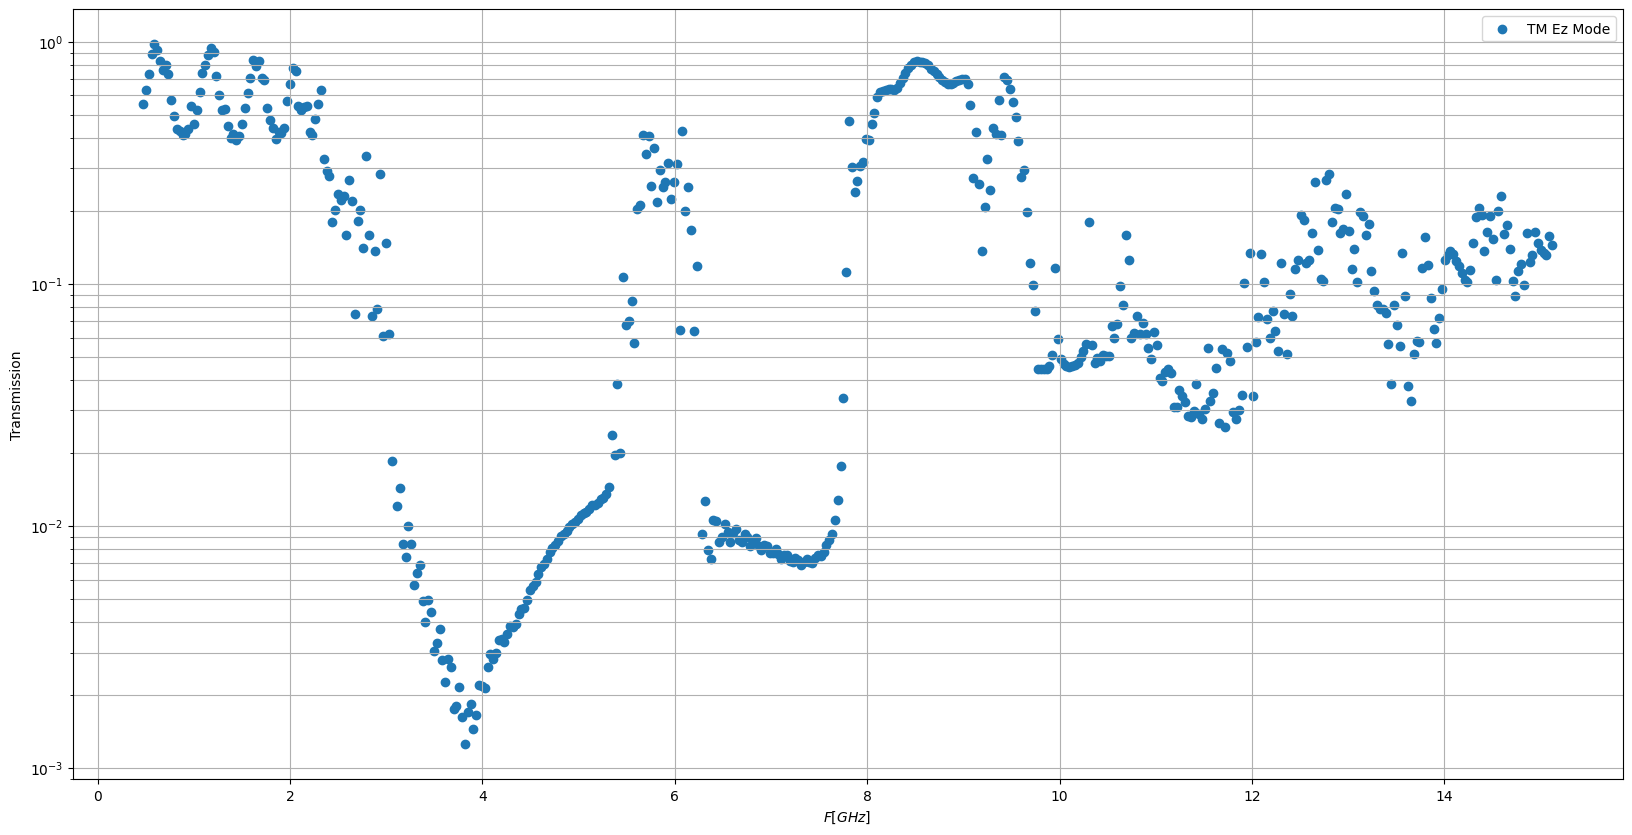

In [ ]:
data_field_intensities=np.zeros(shape=(1262,500))
data_field_intensities_ref=np.zeros(shape=(1262,500))
plt.figure(figsize=(20, 10))
directory = r"H:\phd stuff\tidy3d\data"
for path_direction in [
  # rf"{directory}\20250617 2D Antennas Experiment Vacuum 0.47-15.12GHz\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=2.2 nu=0.025 - 0.8"
  rf"{directory}/20250617 2D eps 40 0.47-15.12GHz/chi_0.37_N_10000_posics/chi_0.37_N_10000_posics_L=2.2 nu=0.025 - 0.8/"
  # rf"{directory}\20250617 2D eps 40 4-9GHz TE Ey Mode/chi_0.37_N_10000_posics/chi_0.37_N_10000_posics_L=2.2 nu=0.21 - 0.48",
  # rf"{directory}\20250617 2D eps 40 4-9GHz TE Ex Mode/chi_0.37_N_10000_posics/chi_0.37_N_10000_posics_L=2.2 nu=0.21 - 0.48",
  # rf"{directory}\20250617 2D eps 37 4-9GHz TE Ex Mode/chi_0.37_N_10000_posics/chi_0.37_N_10000_posics_L=2.2 nu=0.21 - 0.48",
  # rf"{directory}/20250617 2D eps 40 4-9GHz TM Mode/chi_0.37_N_10000_posics/chi_0.37_N_10000_posics_L=2.2 nu=0.21 - 0.48"
  # rf"{directory}\20250617 2D eps 28 4-9GHz TE Ex Mode\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=2.2 nu=0.21 - 0.48",
  # rf"{directory}\20250617 2D eps 28 4-9GHz TE Ey Mode\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=2.2 nu=0.21 - 0.48",
  # rf"{directory}\20250617 2D eps 28 4-9GHz TM Mode\chi_0.37_N_10000_posics\chi_0.37_N_10000_posics_L=2.2 nu=0.21 - 0.48"
                       ]:
  folder_path = f"{path_direction}"
  for i,filename in enumerate(natsorted(os.listdir(folder_path))):
    if not Path(filename).suffix==".txt":
      continue
    if os.path.isfile(os.path.join(folder_path, filename)):
      file=os.path.join(folder_path, filename)
      structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
      sim_data, sim_data0 = structure_1.sim_data, structure_1.sim_data0
      transmission0 = sim_data0['flux1'].flux
      transmission = sim_data['flux1'].flux
      transmission0_2 = sim_data0['flux2'].flux
      transmission_2 = sim_data['flux2'].flux
      transmission_normalized_1 = transmission / transmission0
      transmission_normalized_2 = transmission_2 / transmission0_2
      lambdas= ((td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs)))*a
      freqs = 3e11/(lambdas)  * 1e-9
      # plt.scatter(freqs,transmission_normalized_1, label=f"Right Monitor")
        
        
      if "TE Ex Mode" in path_direction:
        field =sim_data["freq_monitorFieldOut"].Ex
        field_ref =sim_data0["freq_monitorFieldOut"].Ex
        plt.scatter(freqs,transmission_normalized_2, label=f"TE Ex Mode")
      elif "TE Ey Mode" in path_direction: 
        field =sim_data["freq_monitorFieldOut"].Ey
        field_ref =sim_data0["freq_monitorFieldOut"].Ey
        plt.scatter(freqs,transmission_normalized_2, label=f"TE Ey Mode")
      elif "TM" in path_direction: 
        field =sim_data["freq_monitorFieldOut"].Ez
        field_ref =sim_data0["freq_monitorFieldOut"].Ez
        plt.scatter(freqs,transmission_normalized_2, label=f"TM Ez Mode")
      else:
        field =sim_data["freq_monitorFieldOut"].Ez
        field_ref =sim_data0["freq_monitorFieldOut"].Ez
        plt.scatter(freqs,transmission_normalized_2, label=f"TM Ez Mode")


       
      indices_x = np.where(np.bool_(field["x"]>=-500/a) & np.bool_(field["x"]<=500/a))[0]
      indices_y = np.array([np.where(np.bool_(field["y"]<=(5.4)))[0][-1]])
      intensity_line = np.abs(field.values[np.ix_(indices_x,indices_y,np.arange((field.values).shape[2]))])**2
      # if "TE Ex Mode" in path_direction: 
      #   intensity_line[:,:,:,np.where(freqs>6.6)]=0
      # else: 
      #     intensity_line[:,:,:,np.where(freqs<=6.6)]=intensity_line[:,:,:,np.where(freqs<=6.6)]*0.5e-2
      intensity_line_ref = np.abs(field_ref.values[np.ix_(indices_x,indices_y,np.arange((field_ref.values).shape[2]))])**2
      data_field_intensities += intensity_line.squeeze()
      data_field_intensities_ref += intensity_line_ref.squeeze()

plt.xlabel(rf'$F[GHz]$')
plt.ylabel('Transmission')
plt.legend()
plt.grid(True,which="both")
plt.yscale("log")
# plt.title(f"{filename}")
plt.show()


In [7]:
from matplotlib.colors import LogNorm
def plot_output_intensity(data_exit,f,log:bool=True):
    colors = [
          (1, 1, 1),  # White
          (0, 0, 1),  # Blue
          (1, 1, 0),  # Yellow
          (0, 1, 0),  # Green
          (1, 0, 0), #Red
          (0, 0, 0), # Black
          ]  

    # Create a custom colormap
    n_bins = 500  # Number of bins for smooth transition
    cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)
    value = np.copy(data_exit)
    # value[value/np.max(value) <= 1e-5] = 0
    value_normalized = value/np.max(value)
    # value_normalized[np.isnan(value_normalized)]=0
    fig, ax = plt.subplots(figsize=(10,5),dpi=100)
    if log:
        im=ax.imshow(value_normalized, 
                     extent =[np.min(f),np.max(f), -500,500], origin ='lower',
                        aspect='auto', cmap=cmap,norm=LogNorm(vmin=np.min(value_normalized), vmax=np.max(value_normalized)))
    else: 
        im=ax.imshow(value_normalized, 
                     extent =[np.min(f),np.max(f), -500,500], origin ='lower',
                        aspect='auto', cmap=cmap,vmin=np.min(value_normalized), vmax=np.max(value_normalized))
    # Add colorbar for reference
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', pad=0.03, location="top", shrink=0.3)
    cbar.ax.text(1.05, 0.5, rf"$|E|^2$", va='center', ha='left', transform=cbar.ax.transAxes)
    
    ax.set_xlabel(rf"F(GHz)")
    ax.set_ylabel(rf"Position(x)")
    # ax.set_xlim(4,9)
    ax.tick_params(axis='both', which='major')
    plt.tight_layout()
    plt.show()

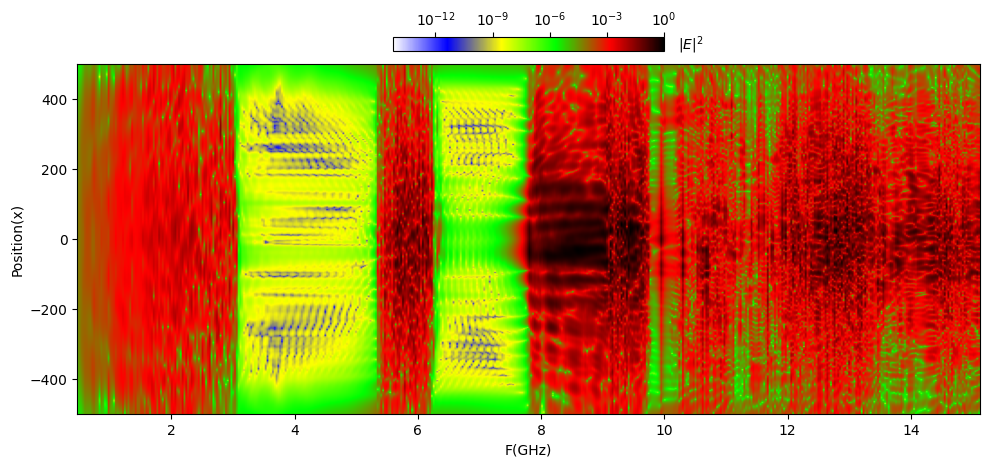

In [8]:
plot_output_intensity(data_field_intensities,freqs,log=True)

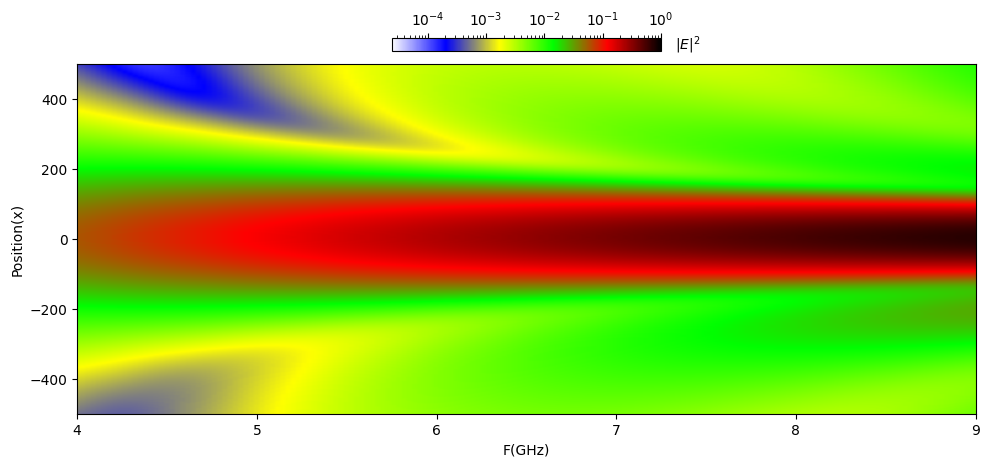

In [6]:
plot_output_intensity(data_field_intensities_ref,freqs,log=True)
